#**SIMULACIÓN DE RESULTADOS**


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, adfuller, pacf


drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab_Notebooks/TFG
df_total = pd.read_csv("total_data.csv",  sep=',')

/content/drive/MyDrive/Colab_Notebooks/TFG


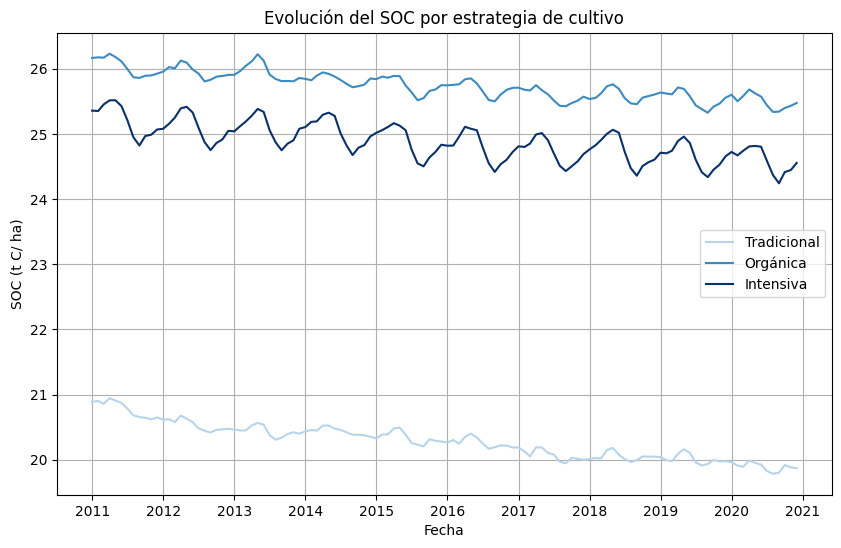

In [3]:
df_total['Fecha'] = pd.to_datetime(df_total['Year'].astype(str) + '-' + df_total['Month'].astype(str))

# Lista de colores en todos azules
def blue_shades(n):
    return plt.cm.Blues(np.linspace(0.3, 1, n))
unique_tipos = df_total['Tipo'].unique()
colors = blue_shades(len(unique_tipos))

# Gráfico para SOC_t_C_ha
plt.figure(figsize=(10, 6))
for color, tipo in zip(colors, unique_tipos):
    subset = df_total[df_total['Tipo'] == tipo]
    subset = subset.sort_values('Fecha')
    plt.plot(subset['Fecha'], subset['SOC_t_C_ha'], label=tipo, color=color)

plt.title('Evolución del SOC por estrategia de cultivo')
plt.xlabel('Fecha')
plt.ylabel('SOC (t C/ ha)')
plt.legend()
plt.grid(True)
plt.show()

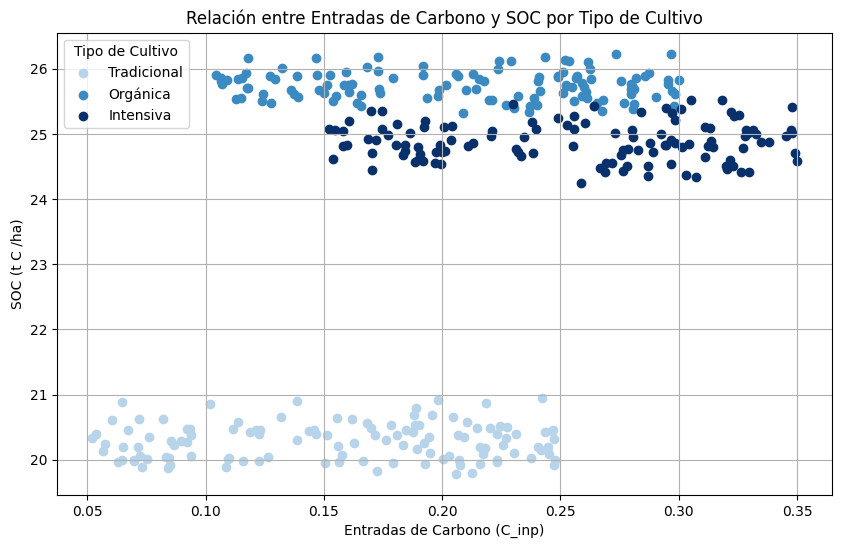

In [4]:
plt.figure(figsize=(10, 6))

# Crea un gráfico de dispersión para cada tipo de cultivo
for color, tipo in zip(colors, unique_tipos):
    subset = df_total[df_total['Tipo'] == tipo]
    plt.scatter(subset['C_inp'], subset['SOC_t_C_ha'], label=tipo,  color=color)

plt.title('Relación entre Entradas de Carbono y SOC por Tipo de Cultivo')
plt.xlabel('Entradas de Carbono (C_inp)')
plt.ylabel('SOC (t C /ha)')
plt.legend(title='Tipo de Cultivo')
plt.grid(True)
plt.show()

<ipython-input-5-35b64dcf06a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo', y='SOC_t_C_ha', data=df_total, palette=blue_palette)


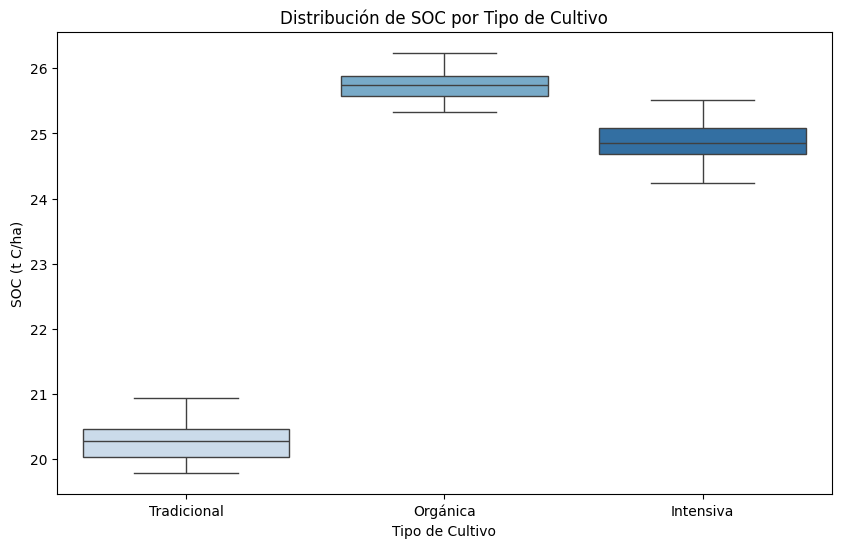

In [5]:
blue_palette = sns.color_palette("Blues", n_colors=df_total['Tipo'].nunique())

#Crea una gráfica de cajas y bigotes sobre la variable SOC_t_C_ha
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo', y='SOC_t_C_ha', data=df_total, palette=blue_palette)
plt.title('Distribución de SOC por Tipo de Cultivo')
plt.ylabel('SOC (t C/ha)')
plt.xlabel('Tipo de Cultivo')
plt.show()


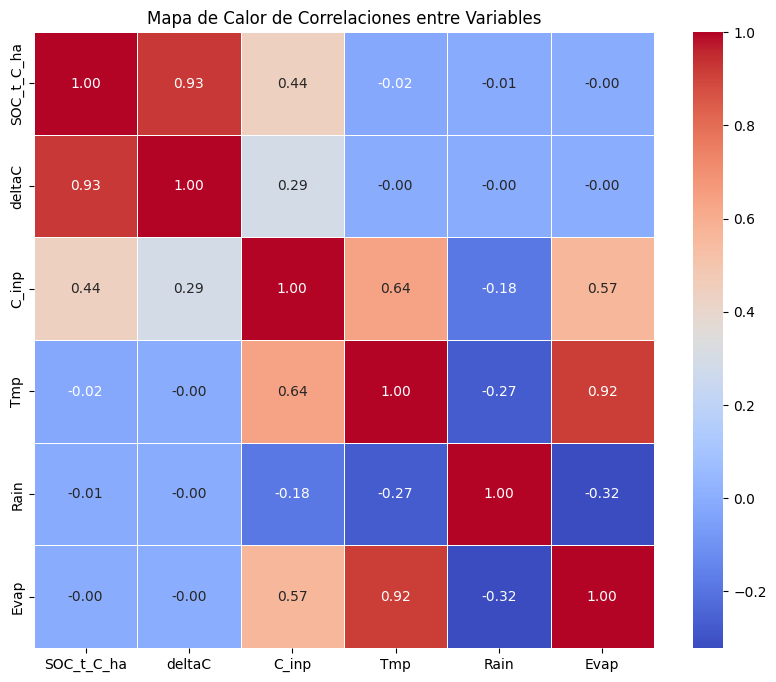

In [6]:


# Calcula la matriz de correlación
correlation_matrix = df_total[['SOC_t_C_ha', 'deltaC', 'C_inp', 'Tmp', 'Rain', 'Evap']].corr()

# Crea el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()


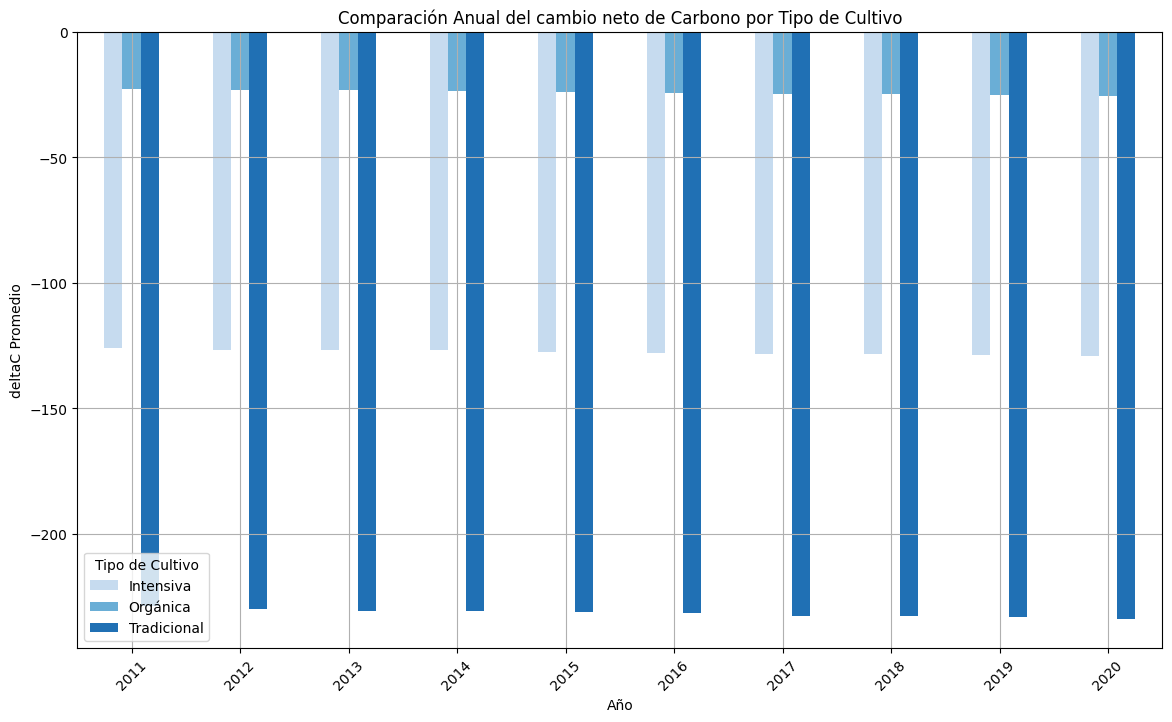

In [7]:
grouped_data = df_total.groupby(['Year', 'Tipo'])['deltaC'].mean().unstack()

blue_palette = sns.color_palette("Blues", len(grouped_data.columns))

# Crea el gráfico de barras agrupadas
ax = grouped_data.plot(kind='bar', figsize=(14, 8), color=blue_palette)
plt.title('Comparación Anual del cambio neto de Carbono por Tipo de Cultivo')
plt.ylabel('deltaC Promedio')
plt.xlabel('Año')
plt.legend(title='Tipo de Cultivo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **ANÁLISIS COMPARATIVO**

In [8]:
df = df_total

Resultados de regresión para Intensiva:
                            OLS Regression Results                            
Dep. Variable:             SOC_t_C_ha   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           3.12e-07
Time:                        17:07:32   Log-Likelihood:                 18.960
No. Observations:                  10   AIC:                            -33.92
Df Residuals:                       8   BIC:                            -33.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-9-b72bbec6fe5b>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(subset['Year_Num'], model.fittedvalues, 'r--', label=f'Linea de ajuste para {tipo}', color='skyblue')


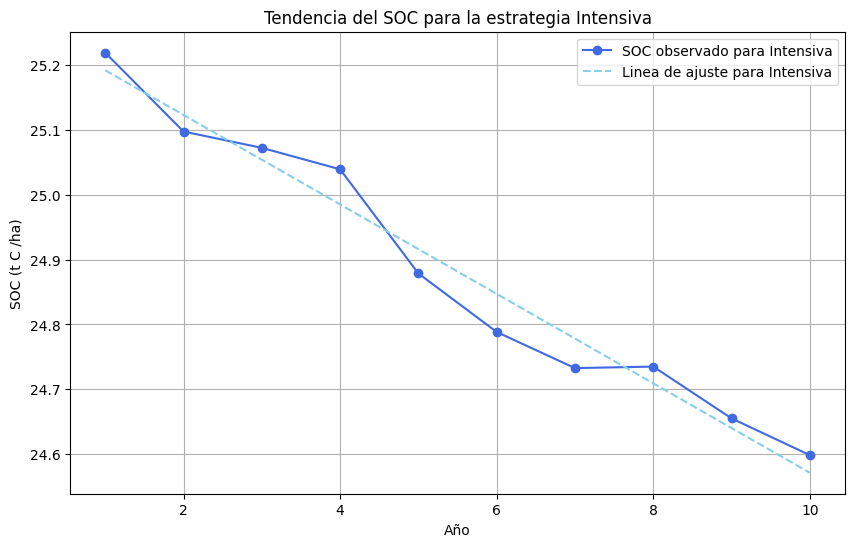

Resultados de regresión para Orgánica:
                            OLS Regression Results                            
Dep. Variable:             SOC_t_C_ha   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     256.1
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           2.33e-07
Time:                        17:07:32   Log-Likelihood:                 20.271
No. Observations:                  10   AIC:                            -36.54
Df Residuals:                       8   BIC:                            -35.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-9-b72bbec6fe5b>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(subset['Year_Num'], model.fittedvalues, 'r--', label=f'Linea de ajuste para {tipo}', color='skyblue')


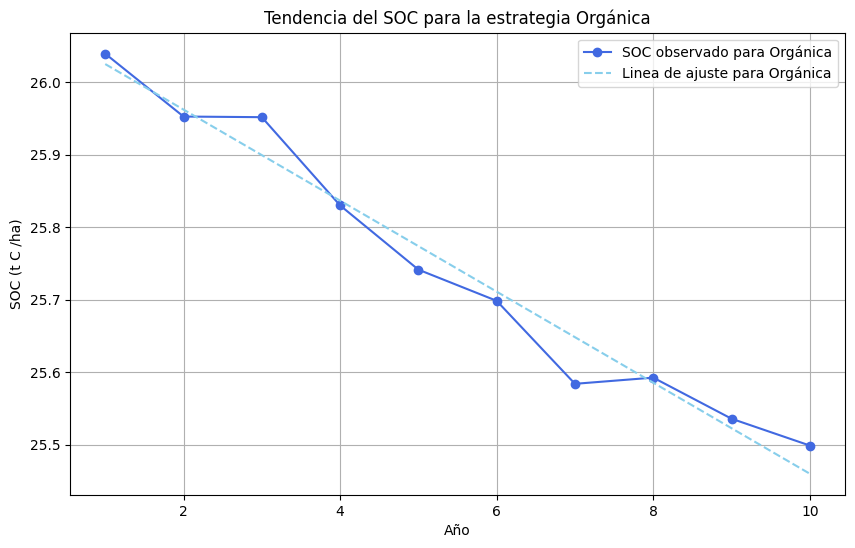

Resultados de regresión para Tradicional:
                            OLS Regression Results                            
Dep. Variable:             SOC_t_C_ha   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           6.16e-07
Time:                        17:07:32   Log-Likelihood:                 15.453
No. Observations:                  10   AIC:                            -26.91
Df Residuals:                       8   BIC:                            -26.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-9-b72bbec6fe5b>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(subset['Year_Num'], model.fittedvalues, 'r--', label=f'Linea de ajuste para {tipo}', color='skyblue')


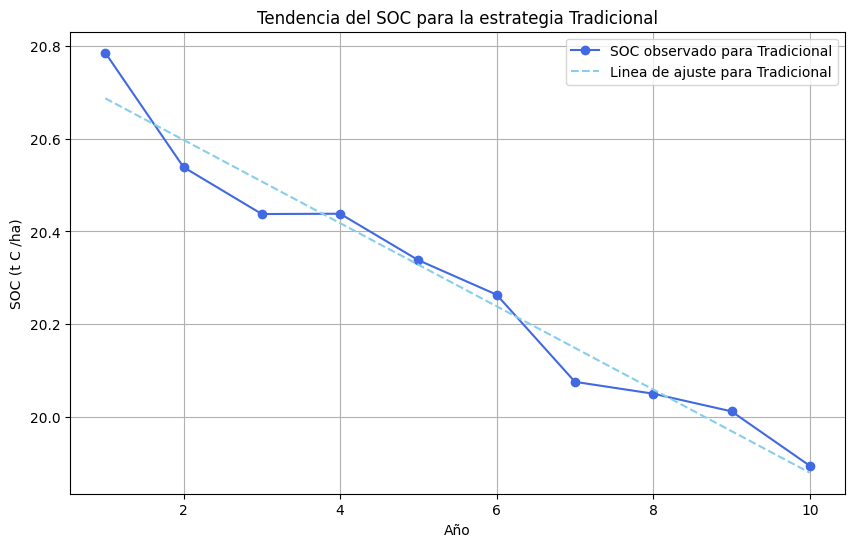

In [9]:
df['Year_Num'] = df['Year'] - df['Year'].min() + 1  # Crear una variable numérica para el año del 1 al 10

# Agrupar y promediar por año para cada tipo
grouped = df.groupby(['Tipo', 'Year_Num']).mean().reset_index() #Para cada tipo de estrategia, se crea un subconjunto del df que guarda las medias de todos los valores

# Realizar una regresión lineal para cada tipo de cultivo
for tipo in grouped['Tipo'].unique():
    subset = grouped[grouped['Tipo'] == tipo] #Se crea un subconjunto del df que contiene solo las filas correspondientes a ese tipo de cultivo.
    X = sm.add_constant(subset['Year_Num'])
    y = subset['SOC_t_C_ha']
    model = sm.OLS(y, X).fit() # MODELO DE REGRESIÓN LINEAL UTILIZANDO OLS
    print(f"Resultados de regresión para {tipo}:")
    print(model.summary())

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(subset['Year_Num'], y, 'o-', label=f'SOC observado para {tipo}', color='royalblue')
    plt.plot(subset['Year_Num'], model.fittedvalues, 'r--', label=f'Linea de ajuste para {tipo}', color='skyblue')
    plt.title(f'Tendencia del SOC para la estrategia {tipo}')
    plt.xlabel('Año')
    plt.ylabel('SOC (t C /ha)')
    plt.legend()
    plt.grid(True)
    plt.show()


A continuación y basándonos en los resultados enteriores, comencermos un análisis mas exhasutivo de los datos correspondientes a la estrategia orgánica.

In [10]:
df_total = pd.read_csv("total_data.csv",  sep=',')
org = df_total[df_total['Tipo'] == 'Orgánica']
org


,Year,Month,modern,Tmp,Rain,Evap,C_inp,FYM,PC,DPM_RPM,DPM_t_C_ha,RPM_t_C_ha,BIO_t_C_ha,HUM_t_C_ha,IOM_t_C_ha,SOC_t_C_ha,deltaC,Tipo
120,2011,1,108.07,5.303508,23.150,1.349773,0.146614,0,0,0.75,0.197900,4.361743,0.497592,18.858343,2.25,26.165578,-22.371428,Orgánica
121,2011,2,107.97,7.077820,34.410,2.638736,0.173042,0,0,0.75,0.182867,4.382929,0.499073,18.860145,2.25,26.175015,-22.309325,Orgánica
122,2011,3,107.87,8.573790,38.670,3.558599,0.118022,0,1,0.75,0.166939,4.391327,0.500051,18.861471,2.25,26.169788,-22.322001,Orgánica
123,2011,4,107.77,14.102174,45.190,9.009341,0.273385,0,1,1.50,0.233843,4.387316,0.499087,18.860303,2.25,26.230550,-22.078692,Orgánica
124,2011,5,107.67,16.707077,36.120,11.786552,0.243293,0,1,1.50,0.223685,4.342002,0.501428,18.862629,2.25,26.179745,-22.265553,Orgánica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2020,8,107.10,21.789395,32.926,16.394469,0.236767,0,1,0.75,0.139836,3.838246,0.466592,18.642404,2.25,25.337078,-25.999086,Orgánica
236,2020,9,107.00,18.804412,28.078,12.815580,0.267457,0,1,0.75,0.152861,3.844638,0.461616,18.633204,2.25,25.342319,-26.007446,Orgánica
237,2020,10,106.90,12.888694,30.704,4.585105,0.230133,0,1,0.75,0.169352,3.888265,0.460772,18.630390,2.25,25.398779,-25.821592,Orgánica
238,2020,11,106.80,9.865588,31.310,1.352734,0.165769,0,1,0.75,0.169736,3.920510,0.461494,18.630066,2.25,25.431805,-25.724308,Orgánica


In [11]:

# Preparar el modelo con múltiples predictores (variables de interés)
X = org[['C_inp', 'FYM', 'PC', 'modern', 'Rain', 'Evap', 'Tmp']]
X = sm.add_constant(X)
y = org['deltaC']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 deltaC   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     15.42
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           7.44e-13
Time:                        17:07:33   Log-Likelihood:                -131.16
No. Observations:                 120   AIC:                             276.3
Df Residuals:                     113   BIC:                             295.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -287.7664     34.432     -8.358      0.0

<ipython-input-12-b603a24d58ea>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(variables, coeficientes, yerr=np.array(errors).T, fmt='o', capsize=5, capthick=2, ecolor='deepskyblue', marker='s', markersize=7, mfc='royalblue')


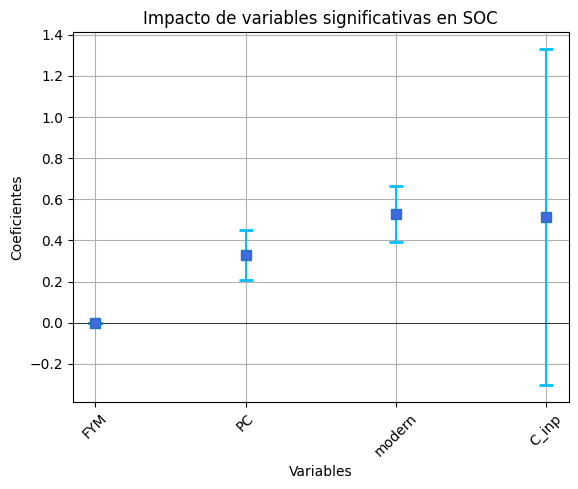

In [12]:


# Datos del modelo (solo variables significativas para la claridad visual)
variables = ['FYM', 'PC', 'modern', 'C_inp']
coeficientes = [2.85e-12, 0.3308, 0.5281,  0.5135]
errors = [(2.85e-12 - 1.5e-12, 4.2e-12 - 2.85e-12), (0.3308 - 0.208, 0.453 - 0.3308), (0.5281 - 0.391, 0.665 - 0.5281), ( 0.5135 -  - 0.303,  1.330 - 0.5135)]

# Creación de la gráfica
fig, ax = plt.subplots()
ax.errorbar(variables, coeficientes, yerr=np.array(errors).T, fmt='o', capsize=5, capthick=2, ecolor='deepskyblue', marker='s', markersize=7, mfc='royalblue')
ax.set_xlabel('Variables')
ax.set_ylabel('Coeficientes')
ax.set_title('Impacto de variables significativas en SOC')
ax.axhline(0, color='black', linewidth=0.5)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-13-f9a08db4e9bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org['Date'] = pd.to_datetime(org[['Year', 'Month']].assign(DAY=1))


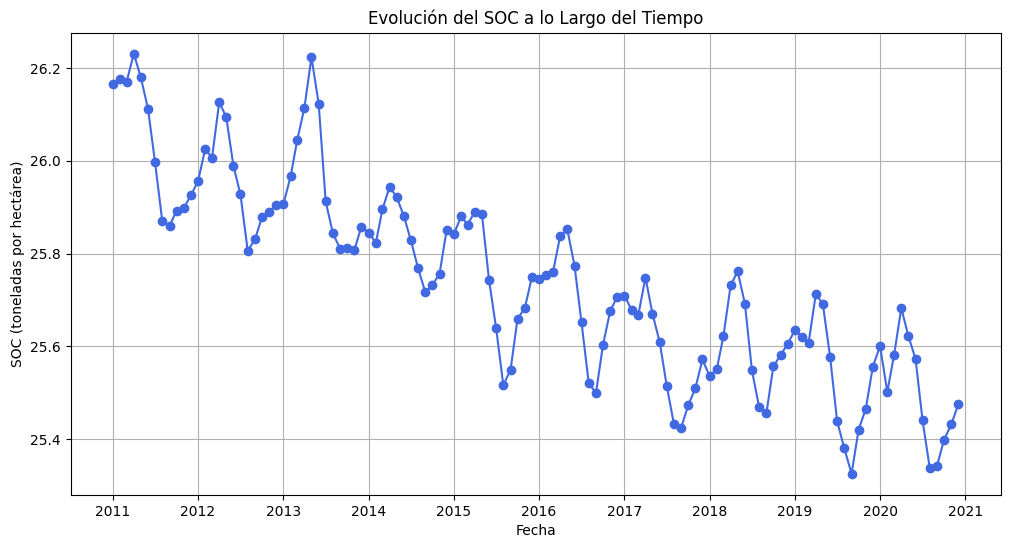

In [13]:

# Crear una nueva columna 'Date' para un análisis temporal más fácil
org['Date'] = pd.to_datetime(org[['Year', 'Month']].assign(DAY=1))

# Graficar SOC_t_C_ha a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(org['Date'], org['SOC_t_C_ha'], marker='o', linestyle='-', color = 'royalblue')
plt.title('Evolución del SOC a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('SOC (toneladas por hectárea)')
plt.grid(True)
plt.show()

<ipython-input-14-164eee316003>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org['Date'] = pd.to_datetime(org[['Year', 'Month']].assign(DAY=1))


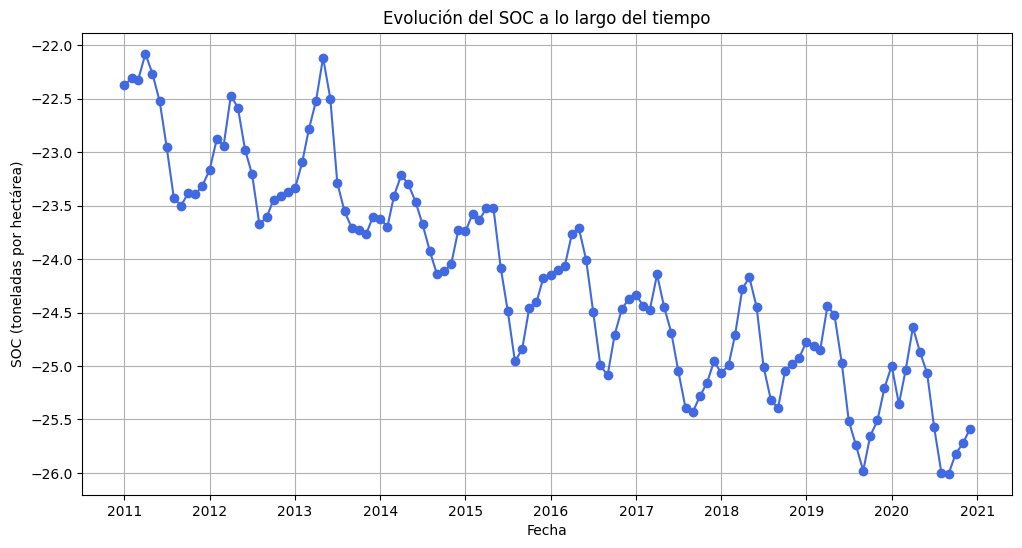

In [14]:

# Crear una nueva columna 'Date' para un análisis temporal más fácil
org['Date'] = pd.to_datetime(org[['Year', 'Month']].assign(DAY=1))

# Graficar SOC_t_C_ha a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(org['Date'], org['deltaC'], marker='o', linestyle='-', color = 'royalblue')
plt.title('Evolución del SOC a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('SOC (toneladas por hectárea)')
plt.grid(True)
plt.show()


# **Modelo de DL**

 **Estudios con modelos de series temporales:**

1. ARIMA

Prueba de Dickey-Fuller:
Estadístico: -0.5686918574151875
p-valor: 0.8779006281185814
Valores Críticos:
	1%: -3.492995948509562
	5%: -2.888954648057252
	10%: -2.58139291903223
Prueba de Dickey-Fuller:
Estadístico: -3.990957197544526
p-valor: 0.0014586092822547224
Valores Críticos:
	1%: -3.492995948509562
	5%: -2.888954648057252
	10%: -2.58139291903223


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

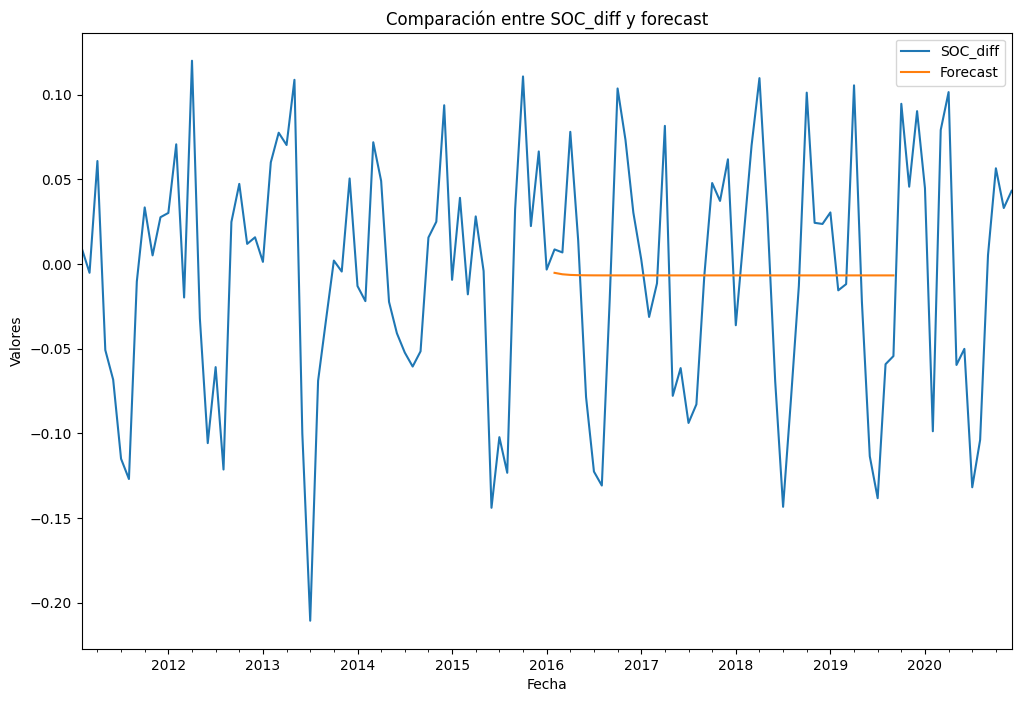

                               SARIMAX Results                                
Dep. Variable:               SOC_diff   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 155.868
Date:                Wed, 15 Jan 2025   AIC                           -305.736
Time:                        17:08:16   BIC                           -297.424
Sample:                    02-01-2011   HQIC                          -302.361
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4377      0.097      4.525      0.000       0.248       0.627
ma.L1         -0.9998      9.611     -0.104      0.917     -19.836      17.836
sigma2         0.0040      0.039      0.104      0.9

In [17]:

df = pd.read_csv("organic_SOC.csv",  sep=',')
# Convertimos 'Year' y 'Month' en una columna de fecha
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

df.set_index('Date', inplace=True)

#Verificando estacionariedad
def test_stationarity(timeseries):
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    result = adfuller(timeseries, autolag='AIC')
    print('Prueba de Dickey-Fuller:')
    print(f'Estadístico: {result[0]}')
    print(f'p-valor: {result[1]}')
    print('Valores Críticos:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

test_stationarity(df['SOC_t_C_ha'])

#Se aplica una diferenciación porque la prueba de DF ha confirmado que la serie no era estacionaria
df['SOC_diff'] = df['SOC_t_C_ha'] - df['SOC_t_C_ha'].shift(1)
df.dropna(inplace=True)
test_stationarity(df['SOC_diff'])

#Ajustando el modelo ARIMA al nuevo conjunto de datos diferenciado
modelo = ARIMA(df['SOC_diff'], order=(1,1,1))  # p, d, q deben ser ajustados según el ACF y PACF
resultado = modelo.fit()

# Predicciones
df['forecast'] = resultado.predict(start=60, end=103, dynamic=True)

#Dibujar las columnas 'SOC_diff' y 'forecast'
ax = df[['SOC_diff', 'forecast']].plot(figsize=(12, 8))

ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Comparación entre SOC_diff y forecast')
ax.legend(['SOC_diff', 'Forecast'])

plt.show()
print(resultado.summary())

Los datos de ARIMA no son los esperados, se pasa al siguiente

2. SARIMA

Prueba de Dickey-Fuller para la serie original:
Estadístico: -0.5686918574151875
p-valor: 0.8779006281185814


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


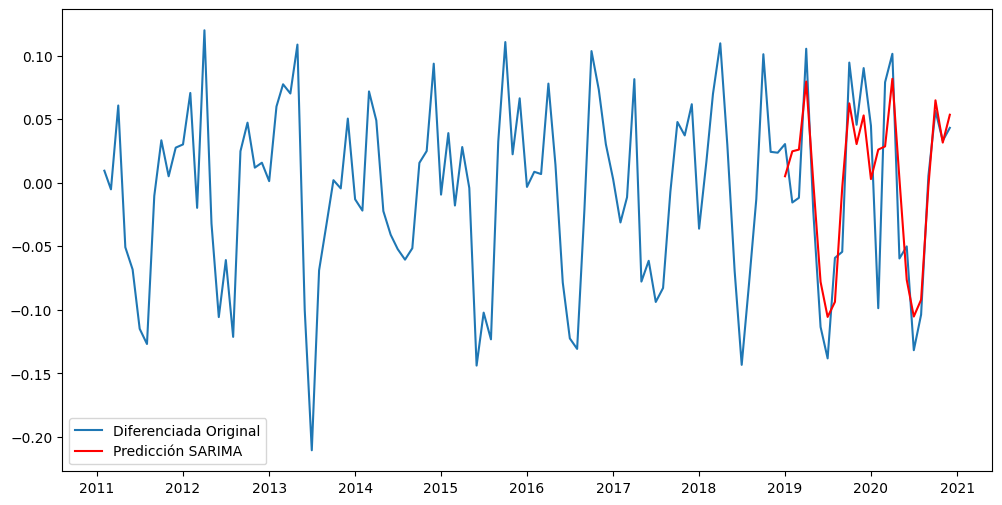

                                     SARIMAX Results                                      
Dep. Variable:                           SOC_diff   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 174.879
Date:                            Wed, 15 Jan 2025   AIC                           -339.758
Time:                                    17:08:23   BIC                           -326.394
Sample:                                01-01-2011   HQIC                          -334.340
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0910      0.106     -0.855      0.393      -0.299       0.118
ma.L1         -0.9916      0.546   

In [18]:

df = pd.read_csv("organic_SOC.csv", sep=',')
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.set_index('Date', inplace=True)

#Prueba de estacionariedad en la serie original
result = adfuller(df['SOC_t_C_ha'])
print('Prueba de Dickey-Fuller para la serie original:')
print(f'Estadístico: {result[0]}')
print(f'p-valor: {result[1]}')

#Diferenciación de la serie
df['SOC_diff'] = df['SOC_t_C_ha'] - df['SOC_t_C_ha'].shift(1)
df['SOC_diff'].dropna(inplace=True)

#Ajuste del modelo SARIMA
model = SARIMAX(df['SOC_diff'],
                order=(1, 1, 1),              # p, d, q no estacionales
                seasonal_order=(1, 1, 1, 12))  # P, D, Q, m estacionales
results = model.fit()


ax.set_title('Comparación entre SOC_diff y forecast')

ax.legend(['SOC_diff', 'Forecast'])

plt.show()

# Predicciones
df['forecast'] = results.predict(start=pd.to_datetime('2019-01-01'), dynamic=True)
plt.figure(figsize=(12, 6))
plt.plot(df['SOC_diff'], label='Diferenciada Original')
plt.plot(df['forecast'], label='Predicción SARIMA', color='red')
plt.legend()
plt.show()

print(results.summary())


# **Predecimos valores futuros**
Basados en el modelo SARIMA entrenado

<ipython-input-19-2ea09295dc33>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=observed_data.index[-1], end='2022-07-01', freq='M')


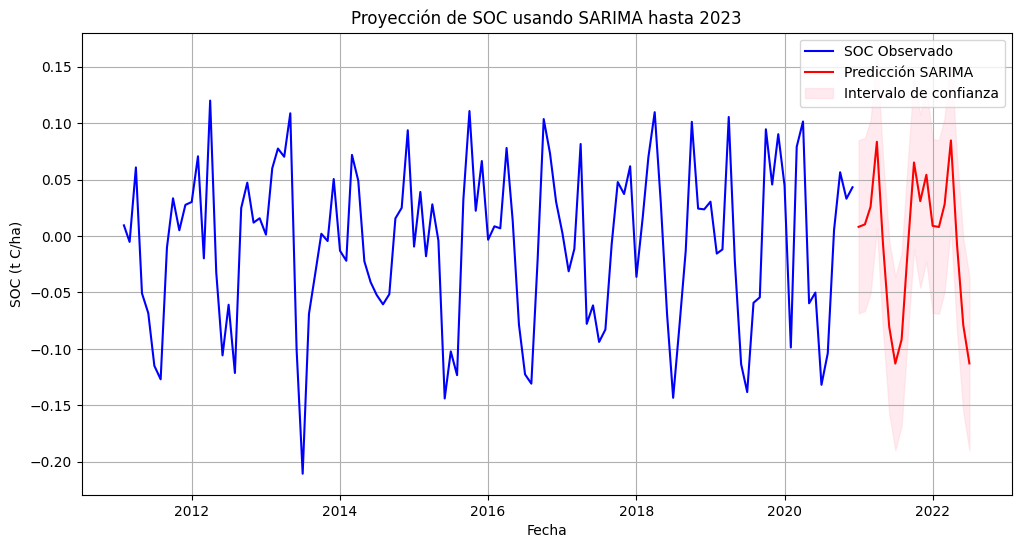

In [19]:
observed_data = df['SOC_diff']


#Generar fechas futuras hasta mediados de 2022

future_dates = pd.date_range(start=observed_data.index[-1], end='2022-07-01', freq='M')

#Predicción usando el modelo ajustado SARIMA
forecast = results.get_forecast(steps=len(future_dates))
predicted_mean = forecast.predicted_mean  # Valores predichos
conf_int = forecast.conf_int()  # Intervalos de confianza

#Crear un DataFrame para las predicciones
forecast_df = pd.DataFrame({
    'Fecha': future_dates,
    'Predicción': predicted_mean,
    'IC_Lower': conf_int.iloc[:, 0],
    'IC_Upper': conf_int.iloc[:, 1]
}).set_index('Fecha')

#Se dibujan los datos observados y las predicciones realizadas con el modelo SARIMA
plt.figure(figsize=(12, 6))
plt.plot(observed_data.index, observed_data, label='SOC Observado', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicción'], label='Predicción SARIMA', color='red')
plt.fill_between(forecast_df.index, forecast_df['IC_Lower'], forecast_df['IC_Upper'], color='pink', alpha=0.3, label='Intervalo de confianza')
plt.title('Proyección de SOC usando SARIMA hasta 2023')
plt.xlabel('Fecha')
plt.ylabel('SOC (t C/ha)')
plt.legend()
plt.grid()
plt.show()

**Evaluación del algortimo SARIMA**

Error cuadrático medio (MSE): 0.0016
Error cuadrático medio raíz (RMSE): 0.0406
Coeficiente de determinación (R^2): 0.7143


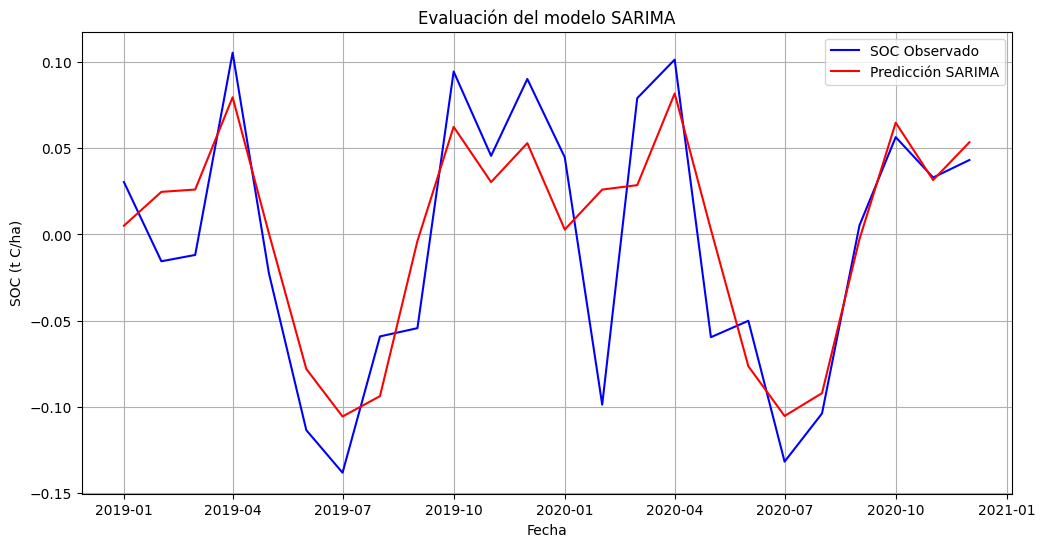

In [20]:
observed = df['SOC_diff'].dropna()
predicted = df['forecast'].dropna()

common_index = observed.index.intersection(predicted.index)
aligned_observed = observed.loc[common_index]
aligned_predicted = predicted.loc[common_index]

mse = mean_squared_error(aligned_observed, aligned_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(aligned_observed, aligned_predicted)

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Error cuadrático medio raíz (RMSE): {rmse:.4f}")
print(f"Coeficiente de determinación (R^2): {r2:.4f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(aligned_observed, label='SOC Observado', color='blue')
plt.plot(aligned_predicted, label='Predicción SARIMA', color='red')
plt.title('Evaluación del modelo SARIMA')
plt.xlabel('Fecha')
plt.ylabel('SOC (t C/ha)')
plt.legend()
plt.grid()
plt.show()